# 📘 NLP Sentiment Analysis Demo
**Author:** AIdepthLab

This notebook demonstrates a complete end-to-end **Sentiment Classification** pipeline using:
- TF-IDF Vectorization  
- Logistic Regression  
- Train/Test evaluation  
- Confusion Matrix  
- Performance metrics  
- Exported PNG results (for Fiverr GIG showcase)

The dataset contains 3 sentiment classes:
- `positive`
- `negative`
- `neutral`

This notebook is designed for Fiverr clients as a clean, minimal, and professional example of text-based machine learning.

In [68]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score
)

os.makedirs("../figures", exist_ok=True)

In [69]:
data = """
The update didn't change much.;neutral
Fantastic experience, will buy again.;positive
Very slow and unresponsive.;negative
Looks even better in real life.;positive
It feels flimsy and fragile.;negative
The texture is fine.;neutral
Buttons work fine.;neutral
User-friendly and reliable.;positive
The app keeps crashing.;negative
Quality is acceptable.;neutral
Returned it immediately.;negative
Battery life is moderate.;neutral
I expected much better.;negative
Really uncomfortable to use.;negative
Performance varies.;neutral
One of my favorite purchases.;positive
The product works perfectly.;positive
Color accuracy is average.;neutral
This was a huge disappointment.;negative
The update made it even better.;positive
Speed is predictable.;neutral
I regret buying this.;negative
Super happy with the results.;positive
Product feels average.;neutral
Setup took some time but worked.;neutral
This made my day, thank you!;positive
The design is simple.;neutral
It fits perfectly.;positive
Does not match the description.;negative
Superb quality!;positive
Nothing extraordinary.;neutral
App loads eventually.;neutral
Very disappointed with this product.;negative
I am 100% satisfied.;positive
Neutral experience overall.;neutral
It’s fine for daily tasks.;neutral
Packaging was fine.;neutral
Very unreliable.;negative
Stunning performance.;positive
Very loud and annoying.;negative
Support responded eventually.;neutral
The size is completely wrong.;negative
Decent but could be better.;neutral
Totally exceeded expectations.;positive
Great job by the developers.;positive
Such a pleasant experience.;positive
It’s acceptable.;neutral
Not the best, not the worst.;neutral
Delivery time was normal.;neutral
Nothing remarkable.;neutral
Super fast delivery and great packaging.;positive
The app loads eventually.;neutral
This solved my problem instantly.;positive
The update made it worse.;negative
Super easy to understand.;positive
The description was misleading.;negative
Price is reasonable.;neutral
Color looks normal.;neutral
Definitely not recommended.;negative
Very intuitive interface.;positive
The material feels rough.;negative
Everything works great.;positive
The performance is outstanding.;positive
Fulfills its purpose.;neutral
The product is defective.;negative
Helpful instructions included.;positive
Very comfortable to use.;positive
App works most of the time.;neutral
Excellent customer service.;positive
Neutral impression overall.;neutral
The texture feels cheap.;negative
Extremely low quality.;negative
Totally recommendable!;positive
Everything seems okay.;neutral
Poorly designed.;negative
Amazing attention to detail.;positive
Average experience overall.;neutral
It broke on the first day.;negative
The colors look beautiful.;positive
The size is standard.;neutral
Best purchase I've made recently.;positive
Great value for the money.;positive
It functions well enough.;neutral
Really enjoyable to use.;positive
Completely stopped functioning.;negative
The product is okay, nothing special.;neutral
Very poor build quality.;negative
Five stars, no doubt.;positive
Very intuitive interface.;positive
Image quality is average.;neutral
Not worth the price at all.;negative
Flawless functionality.;positive
Nothing special at all.;negative
This product deserves 5 stars.;positive
The quality matches the price.;neutral
Five stars, recommended!;positive
Very frustrated to use.;negative
Neutral usage experience.;neutral
Does what it’s supposed to.;neutral
Terrible experience overall.;negative
App works most of the time.;neutral
Hard to set up and use.;negative
Amazing quality, totally worth the price.;positive
User experience is acceptable.;neutral
Smooth performance overall.;positive
Better than expected!;positive
Does not work as advertised.;negative
Definitely not worth buying.;negative
The sound quality is awful.;negative
Absolutely no regrets!;positive
It feels premium and durable.;positive
Everything was exactly as described.;positive
Buttons are unresponsive.;negative
Unacceptable quality.;negative
Stunning attention to detail.;positive
The item arrived damaged.;negative
Helpful instructions included.;positive
Performance is stable.;neutral
Doesn’t connect properly.;negative
Durability seems average.;neutral
Missing parts in the package.;negative
It’s functional.;neutral
Quick response from support.;positive
Very happy with this!;positive
A must-have product.;positive
The design is very basic.;neutral
Super smooth interface.;positive
Very disappointing experience.;negative
The packaging was horrible.;negative
Hardware feels average.;neutral
Smooth and fast interface.;positive
Excellent product for the price.;positive
Premium design and feel.;positive
The product feels standard.;neutral
Won’t turn on at all.;negative
Very unreliable.;negative
Could be better.;neutral
Neither liked nor disliked.;neutral
Sensors don’t work reliably.;negative
The update did not change much.;neutral
This product is typical.;neutral
Super happy with the results.;positive
Amazing quality.;positive
The instructions were okay.;neutral
Feels uncomfortable.;negative
Definitely not worth buying.;negative
Five stars without hesitation.;positive
Positive overall experience.;positive
User-friendly and reliable.;positive
Setup was very easy.;positive
Very slow shipping.;negative
The interface is basic.;neutral
Nothing extraordinary.;neutral
Color accuracy normal.;neutral
Neither good nor bad.;neutral
Feels very well-made.;positive
Packaging was fine.;neutral
Support was unhelpful.;negative
This improved my workflow a lot.;positive
Definitely recommendable!;positive
The app loads eventually.;neutral
I’ll definitely order again.;positive
Very positive experience overall.;positive
Buttons are unresponsive.;negative
Sound quality normal.;neutral
Battery life normal.;neutral
Perfect for daily use.;positive
Not what I expected.;negative
Fulfills its purpose.;neutral
Neither too fast nor too slow.;neutral
Nothing remarkable.;neutral
Great design and functionality.;positive
Smooth interface.;positive
Very unreliable.;negative
Camera quality is average.;neutral
Everything works great.;positive
Totally exceeded expectations.;positive
Shipping took forever.;negative
No strong feelings either way.;neutral
Normal usage experience.;neutral
User experience is acceptable.;neutral
This fits perfectly.;positive
Super intuitive experience.;positive
Not my favorite, but fine.;neutral
Worst experience ever.;negative
Neutral impression overall.;neutral
Performance is predictable.;neutral
"""

In [70]:
rows = [line.split(";") for line in data.strip().split("\n")]
df = pd.DataFrame(rows, columns=["text", "label"])

df.to_csv("nlp_sentiment_dataset.csv", index=False)

df.head(), df.label.value_counts()

(                                    text     label
 0         The update didn't change much.   neutral
 1  Fantastic experience, will buy again.  positive
 2            Very slow and unresponsive.  negative
 3        Looks even better in real life.  positive
 4           It feels flimsy and fragile.  negative,
 label
 neutral     68
 positive    68
 negative    51
 Name: count, dtype: int64)

In [96]:
vectorizer = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=1,
    max_df=0.9,
    sublinear_tf=True
)

X = vectorizer.fit_transform(df["text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

model = LogisticRegression(max_iter=3000, C=2.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
acc

0.7631578947368421

In [97]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.75      0.30      0.43        10
     neutral       0.87      0.93      0.90        14
    positive       0.68      0.93      0.79        14

    accuracy                           0.76        38
   macro avg       0.77      0.72      0.70        38
weighted avg       0.77      0.76      0.73        38



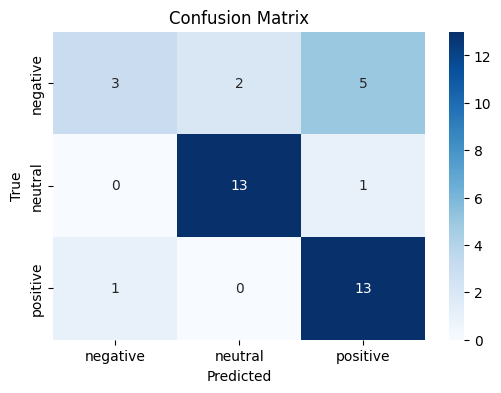

In [98]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.savefig("../figures/nlp_confusion_matrix.png", dpi=150, bbox_inches="tight")
plt.show()